Importing required libraries

In [83]:
import numpy as np
import math
import pandas as pd
import scipy.integrate as sci
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
%matplotlib inline

Defining our model

In [84]:
def SIR_model(y, t, r, a):
    S, I, R = y

    dS_dt = -r * S * I
    dI_dt = r * S * I - a * I
    dR_dt = a * I

    return ([dS_dt, dI_dt, dR_dt])

In [85]:
N = 1792147 #Population
S_initial = 1792146 / N
I_initial = 1 / N
R_initial = 0

Reading and displaying the Data File

In [86]:
df = df = pd.read_csv('DataFinal.csv')
print(df)

       Date  Deaths  Confirmed    I        S  Cured     R  Day
0   3/18/20       0          1    1  1792146      0     0    0
1   3/19/20       0          2    2  1792145      0     0    1
2   3/20/20       0          8    8  1792139      0     0    2
3   3/21/20       0         12   12  1792135      0     0    3
4   3/22/20       0         16   16  1792131      0     0    4
..      ...     ...        ...  ...      ...    ...   ...  ...
88  6/14/20      88       2290  514  1789857   1688  1776   88
89  6/15/20      88       2321  545  1789826   1688  1776   89
90  6/16/20      88       2340  564  1789807   1688  1776   90
91  6/17/20      88       2376  600  1789771   1688  1776   91
92  6/18/20      88       2418  642  1789729   1688  1776   92

[93 rows x 8 columns]


Finding the values of the constants (a and r) using the data

In [87]:
S = df['S']
I = df['I']
R = df['R']

def rho_val(j):
    return (-R[j]) / math.log(S[j]/S[0]) #We get this formula by integrating dI/dS


rho_all = [rho_val(i) for i in range(1 ,93)]
rho = sum(rho_all) / 92

alpha = math.sqrt((S[0]/rho - 1) ** 2 + (2 * S[0] * (N - S[0])) / (rho ** 2))
phi = np.arctanh([(S[0]/rho - 1) / alpha])[0]

def a_val(t):
    y = (((R[t]*S[0]) / (rho*rho) - S[0]/rho + 1)) / alpha
    tan_val = np.arctanh([y])[0]
    return ((phi + tan_val) * 2) / (alpha * t)

a_all = [a_val(t) for t in range(1, 93)]
a = sum(a_all) / 92
r = a / rho * N
print(a,r)

0.13647556118820442 0.2574769170389439


In [92]:
R_0 = (r/a) * S_initial 
print(R_0)

1.886614505393715


Plotting the graph

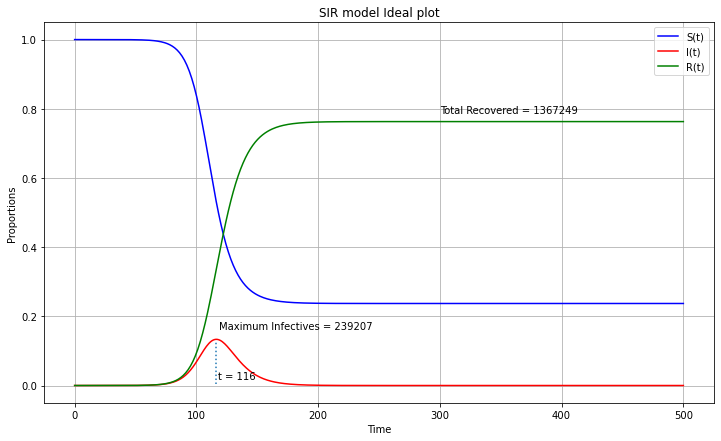

In [88]:
t = np.linspace(0, 500, 500)

solution = sci.odeint(SIR_model, [S_initial, I_initial, R_initial], t, args= (r, a))

solution = np.array(solution)

plt.figure(figsize=[12, 7])

S = solution[:, 0]  # Proportion of Susceptible People
I = solution[:, 1]  # Proportion of Infected People
R = solution[:, 2]  # Proportion of Recovered People

plt.plot(t, S, label="S(t)", color='blue')
plt.plot(t, I, label="I(t)", color='red')
plt.plot(t, R, label="R(t)", color='green')


plt.grid()
plt.legend()

plt.title("SIR model Ideal plot")

plt.ylabel("Proportions")
plt.xlabel("Time")

Imax = max(I)
i = I.tolist()
indexI = i.index(Imax)

Rmax = max(R)
indexR = R.tolist().index(Rmax)

plt.text(indexI + 2.5, Imax + 0.03, "Maximum Infectives = " + str(int(Imax * N)))
plt.axvline(x = indexI, ymin = 0.05, ymax=Imax + 0.025 , linestyle='dotted')
plt.text(indexI + 2, 0.02, "t = " + str(indexI))
plt.text(300, Rmax + 0.025, "Total Recovered = " + str(int(Rmax * N)))

plt.show()

Text(0.5, 1.0, 'Deviation in the number of Susceptible People')

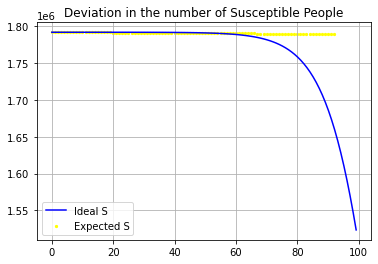

In [89]:
plt.plot(t[:100], S[:100]*N, label="Ideal S", color='blue')
plt.scatter(df['Day'],df['S'], color = 'yellow', s = 5,label = 'Expected S')
plt.legend()
plt.grid()
plt.title("Deviation in the number of Susceptible People")

Text(0.5, 1.0, 'Deviation in the number of Infected People')

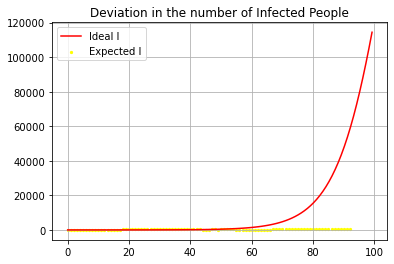

In [90]:
plt.plot(t[:100], I[:100]*N, label="Ideal I", color='red')
plt.scatter(df['Day'],df['I'], color = 'yellow', s = 5,label = 'Expected I')
plt.legend()
plt.grid()
plt.title("Deviation in the number of Infected People")

Text(0.5, 1.0, 'Deviation in the number of Recovered People')

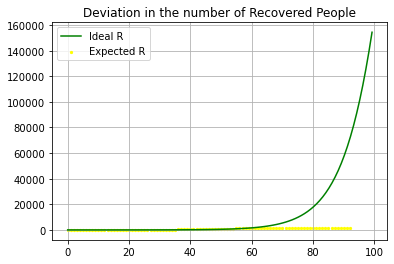

In [91]:
plt.plot(t[:100], R[:100]*N, label="Ideal R", color='green')
plt.scatter(df['Day'],df['R'], color = 'yellow', s = 5,label = 'Expected R')
plt.legend()
plt.grid()
plt.title("Deviation in the number of Recovered People")